In [6]:
!pip install tensorflow

     |████████████████████████████████| 458.3 MB 37 kB/s              
     |████████████████████████████████| 1.3 MB 42.8 MB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 132 kB 40.2 MB/s            
     |████████████████████████████████| 4.3 MB 54.1 MB/s            
     |████████████████████████████████| 65 kB 12.9 MB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 5.6 MB 36.7 MB/s            
     |████████████████████████████████| 42 kB 4.6 MB/s             
     |████████████████████████████████| 1.1 MB 59.3 MB/s            
     |████████████████████████████████| 462 kB 48.5 MB/s            
     |████████████████████████████████| 57 kB 14.4 MB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 4.0 MB 27.8 MB/s            
     |████████████████████████████████| 781 kB 50.0 MB/s            
     |████████████████████████████████| 4.9 MB 51.

In [7]:
!pip install keras

# Step 1: Understanding Dataset


In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import tensorflow as tensorflow
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.utils.vis_utils import plot_model

In [105]:
df = pd.read_csv('forestfires.csv')
df.head(40)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
5,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,...,0,0,0,0,0,0,0,0,0,small
7,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
8,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,...,0,0,0,0,0,0,0,0,1,small
9,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,...,0,0,0,0,0,0,0,0,1,small


In [106]:
df['size_category'].value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [107]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [108]:
# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
df['month']= label_encoder.fit_transform(df['month']) 
#df['day']= label_encoder.fit_transform(df['day']) 

print(df.head())

   month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  ...  monthfeb  \
0      7  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0  ...         0   
1     10  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0  ...         0   
2     10  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0  ...         0   
3      7  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2  ...         0   
4      7  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0  ...         0   

   monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0         0         0         0         1         0         0         0   
1         0         0         0         0         0         0         1   
2         0         0         0         0         0         0         1   
3         0         0         0         1         0         0         0   
4         0         0         0         1         0         0         0   

   monthsep  size_category  
0         0          small  
1         0          s

# Step 2: Data Preprocessing


In [109]:
df['size_category'] = np.where(df['area']>6, '1', '0')
df['size_category']= pd.to_numeric(df['size_category'])
df.tail(40)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
477,5,sun,93.7,101.3,423.4,14.7,26.1,45,4.0,0.0,...,0,0,1,0,0,0,0,0,0,1
478,5,sun,93.7,101.3,423.4,14.7,18.2,82,4.5,0.0,...,0,0,1,0,0,0,0,0,0,0
479,5,mon,89.2,103.9,431.6,6.4,22.6,57,4.9,0.0,...,0,0,1,0,0,0,0,0,0,1
480,5,thu,93.2,114.4,560.0,9.5,30.2,25,4.5,0.0,...,0,0,1,0,0,0,0,0,0,0
481,5,thu,93.2,114.4,560.0,9.5,30.2,22,4.9,0.0,...,0,0,1,0,0,0,0,0,0,0
482,1,sun,94.9,130.3,587.1,14.1,23.4,40,5.8,0.0,...,0,0,0,0,0,0,0,0,0,0
483,1,sun,94.9,130.3,587.1,14.1,31.0,27,5.4,0.0,...,0,0,0,0,0,0,0,0,0,0
484,1,sun,94.9,130.3,587.1,14.1,33.1,25,4.0,0.0,...,0,0,0,0,0,0,0,0,0,1
485,1,mon,95.0,135.5,596.3,21.3,30.6,28,3.6,0.0,...,0,0,0,0,0,0,0,0,0,0
486,1,tue,95.1,141.3,605.8,17.7,24.1,43,6.3,0.0,...,0,0,0,0,0,0,0,0,0,0


In [110]:
df['month'].unique()

array([ 7, 10,  1, 11,  0,  6,  5,  3,  4,  2,  8,  9])

In [111]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count plot of weekend vs weekday')

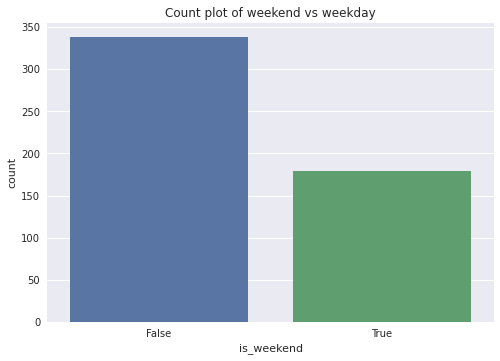

In [112]:
# converting to is weekend
df['day'] = ((df['day'] == 'sun') | (df['day'] == 'sat'))
# renaming column
df = df.rename(columns = {'day' : 'is_weekend'})
# visualizing
sns.countplot(df['is_weekend'])
plt.title('Count plot of weekend vs weekday')

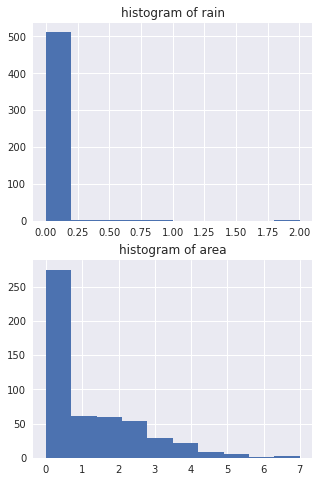

In [113]:
# natural logarithm scaling (+1 to prevent errors at 0)
df.loc[:, ['rain', 'area']] = df.loc[:, ['rain', 'area']].apply(lambda x: np.log(x + 1), axis = 1)
# visualizing
fig, ax = plt.subplots(2, figsize = (5, 8))
ax[0].hist(df['rain'])
ax[0].title.set_text('histogram of rain')
ax[1].hist(df['area'])
ax[1].title.set_text('histogram of area')

In [114]:
features = df.drop(['size_category'], axis = 1)
labels = df['size_category'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(features,labels, test_size = 0.2, random_state = 42)

In [115]:
# fitting scaler
sc_features = StandardScaler()
# transforming features
X_test = sc_features.fit_transform(X_test)
X_train = sc_features.transform(X_train)
# features
X_test = pd.DataFrame(X_test, columns = features.columns)
X_train = pd.DataFrame(X_train, columns = features.columns)
# labels
y_test = pd.DataFrame(y_test, columns = ['size_category'])
y_train = pd.DataFrame(y_train, columns = ['size_category'])
X_train.head()

,month,is_weekend,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,1.329914,1.404076,0.342959,-0.060220,0.867158,-0.249015,0.784070,-1.071784,-0.054362,-0.137348,...,-0.172345,-0.140028,-0.098533,-0.172345,-0.2,-0.361158,-0.098533,0.0,-0.140028,1.570563
1,1.329914,-0.712212,-0.057456,0.370353,0.600021,-0.465731,-0.203920,-0.279375,-1.042369,-0.137348,...,-0.172345,-0.140028,-0.098533,-0.172345,-0.2,-0.361158,-0.098533,0.0,-0.140028,1.570563
2,-0.963802,-0.712212,0.312158,0.834731,0.483714,0.664288,0.221938,0.248898,-0.054362,-0.137348,...,-0.172345,-0.140028,-0.098533,-0.172345,-0.2,-0.361158,-0.098533,0.0,-0.140028,-0.636715
3,-0.963802,-0.712212,1.544206,1.341810,0.537142,0.664288,2.283090,-1.071784,-1.042369,-0.137348,...,-0.172345,-0.140028,-0.098533,-0.172345,-0.2,-0.361158,-0.098533,0.0,-0.140028,-0.636715
4,-0.505059,1.404076,-1.320305,-1.602809,-2.022846,-0.945602,-1.106740,0.645102,-1.042369,-0.137348,...,-0.172345,7.141428,-0.098533,-0.172345,-0.2,-0.361158,-0.098533,0.0,-0.140028,-0.636715


# Step 3: Hyperparameter/ Experiment Results


In [135]:
model = Sequential()
# input layer + 1st hidden layer
model.add(Dense(6, input_dim=30, activation='relu'))
# 2nd hidden layer
model.add(Dense(6, activation='relu'))
# output layer
model.add(Dense(6, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'relu'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 6)                 186       
_________________________________________________________________
dense_25 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_26 (Dense)             (None, 6)                 42        
_________________________________________________________________
dropout_6 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 7         
Total params: 277
Trainable params: 277
Non-trainable params: 0
_________________________________________________________________


In [136]:
# Compile Model
# Compile model
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(optimizer = 'adam', metrics=['accuracy'], loss ='binary_crossentropy')
# Train Model
# evaluate the model
#scores = model.evaluate(X_train, y_train)
#print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size = 10, epochs = 100)

Epoch 1/100
42/42 [==============================] - 1s 8ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308
Epoch 2/100
42/42 [==============================] - 0s 4ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308
Epoch 3/100
42/42 [==============================] - 0s 5ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308
Epoch 4/100
42/42 [==============================] - 0s 5ms/step - loss: 4.1141 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308
Epoch 5/100
42/42 [==============================] - 0s 5ms/step - loss: 4.1463 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308
Epoch 6/100
42/42 [==============================] - 0s 5ms/step - loss: 4.1463 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308
Epoch 7/100
42/42 [==============================] - 0s 4ms/step - loss: 4.1197 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308
Epoch 8/100
4

In [139]:
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, valid_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Valid: %.3f' % (train_acc, valid_acc))

Train: 0.995, Valid: 0.942


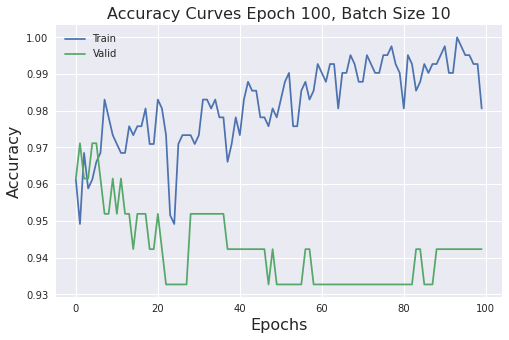

In [140]:
plt.figure(figsize=[8,5])
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Valid')
plt.legend()
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves Epoch 100, Batch Size 10', fontsize=16)
plt.show()